# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [126]:
# Run this code:

%matplotlib inline

import matplotlib.pyplot as plt

In [127]:
# Import numpy and pandas:
import numpy as np
import pandas as pd


# Challenge 1 - Reading and Standardizing the Data

In this challenge we will work with image data and reduce the dimensions of the data to create a 2 dimensional plot. While we have not worked much with image data before, it can be represented as a numpy array where each pixel is assigned a numeric value. In this lesson, we will look at a dataset of cats and a dataset of dogs and see whether reducing them to two dimensions allows us to see if the data is separable. We will start by loading and processing the data. Run the cell below to load the two csv files and convert them into numpy arrays.

In [128]:
# Run this code

cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", header=None))
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", header=None))

Next, we'll examine the shape of both the cats and the dogs arrays. Print out both shapes below.

In [129]:
# Your code here:
cats.shape

(4096, 80)

In [130]:
dogs.shape

(4096, 80)

What this means is that both arrays contain 80 images each (the number of columns). Each image is comprised of 64x64 pixels (so a total of 4096 pixels per image). The images have been flattened such that all 4096 are in a single row.

Print out column 0 of the cats array to see what the pixels values look like.

In [131]:
# Your code here:
cats[:,0]


array([64, 64, 64, ..., 64, 64, 61], dtype=int64)

Using `matplotlib` we can plot a single cat or a single dog. We do this by reshaping the vector back to a 64x64 image and then using the `imshow` function.

Run the code below to look at the first dog and the first cat.

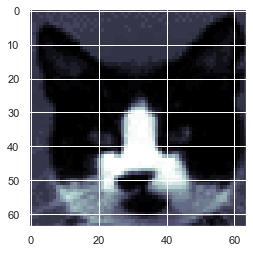

In [132]:
# Run this code:

fig, ax = plt.subplots()
ax.imshow(cats[:,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

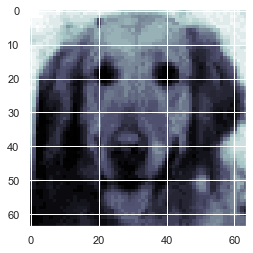

In [133]:
# Run this code:

fig, ax = plt.subplots()
ax.imshow(dogs[:,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

Now, use the `np.concatenate` function to combine the cats and dogs arrays. Use `axis=1` to combine the two correctly. Make sure to put dogs first.

In [134]:
# Your code here:
cats_dogs = np.concatenate((dogs,cats),axis=1)
cats_dogs.shape


(4096, 160)

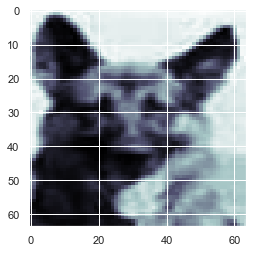

In [135]:
fig, ax = plt.subplots()
ax.imshow(cats_dogs[:,79].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

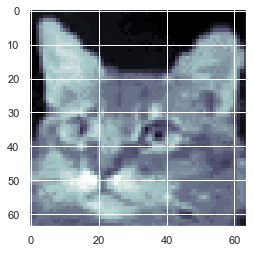

In [136]:
fig, ax = plt.subplots()
ax.imshow(cats_dogs[:,81].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

Next, we would like to create a standardization function. This function will find the mean and standard deviation of each image. We subtract the mean from each pixel and divide each pixel by the standard deviation. Write the function below.

In [137]:
#Your code here:
def standardization(array):
    standardized = np.copy(array)
    for i in range(standardized.shape[1]):
        mean = np.mean(standardized[:, i])
        std = np.std(standardized[:, i])
        standardized[:, i] = (standardized[:, i] - mean) / std
    return standardized

In [138]:
cats_dogs_std = standardization(cats_dogs)
cats_dogs_std.shape

(4096, 160)

Standarized images

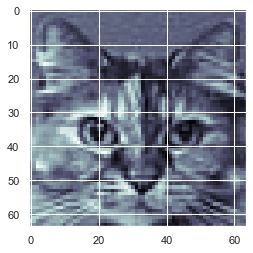

In [139]:
fig, ax = plt.subplots()
ax.imshow(cats_dogs[:,159].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

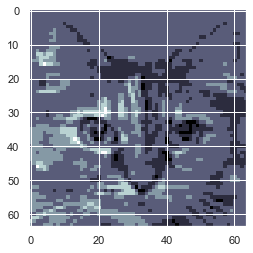

In [140]:
fig, ax = plt.subplots()
ax.imshow(cats_dogs_std[:,159].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

In [141]:
cats_dogs_std.T.shape

(160, 4096)

# Challenge 2 - Using PCA

Now that we have created a standardized matrix of cats and dogs, we'll find the two most important components in the data.

1. Load the `PCA` function from statsmodel. Create a PCA model with two components.
You might need to transpose your data to get the right results.

In [142]:
# Your code here:
from statsmodels.multivariate.pca import PCA

pca_stats= PCA(cats_dogs_std.T,ncomp=2)


In [143]:
components_stats = pca_stats.factors

2.  And now lets do the same with sklearn library.

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_sklearn = pca.fit_transform(cats_dogs_std.T)

# Challenge 3 - Plotting the Data

Now that we have reduced our cats and dogs arrays, we can easily plot the data in a way that the human eye can understand. We can look at this plot to see whether there are differences between the cat and dog images. 

In the cell below, turn the two dimensional projection into a pandas dataframe and name the columns `pc1`, and `pc2` respectively.

### First I will do that for the PCA obtained from stats models

### PCA from sklearn

In [145]:
# Your code here:
pca_sklearn


array([[ 2.87110318e+01,  1.81156156e+01],
       [ 2.35876701e+01, -8.60243672e+00],
       [-6.25011154e+00,  1.40611740e-02],
       [ 4.15210426e+00, -1.86779940e+01],
       [ 1.55528759e+01, -3.48188593e-01],
       [-4.93141448e+00, -2.42692270e+01],
       [ 1.02934381e+01, -3.20361842e+00],
       [ 1.13429528e+01, -1.70641566e+01],
       [ 9.19733508e+00, -2.02722370e+01],
       [ 2.07340726e+01,  5.28357178e+00],
       [-2.12372215e+00, -1.63099525e+01],
       [ 1.27094356e+01, -1.20208452e+01],
       [ 3.81267881e+00, -2.54256045e+00],
       [ 1.99424395e-01, -8.61810481e-01],
       [ 1.14740304e+01, -1.02507874e+01],
       [ 1.44066747e+01, -1.75955792e+01],
       [ 9.27944488e+00,  1.14244796e-01],
       [ 2.55182056e+01, -8.51617685e+00],
       [ 1.17061595e+01, -1.16193707e+01],
       [ 1.15473567e+01, -2.15805563e+01],
       [-6.36388724e+00, -2.06429968e+01],
       [ 1.56399171e+00, -1.91510076e+01],
       [ 4.60996582e+00,  2.12765713e+00],
       [ 1.

In [146]:
df = pd.DataFrame(pca2)
df.columns =['pca1','pca2']
df

,pca1,pca2
0,28.711032,18.115625
1,23.587670,-8.602411
2,-6.250112,0.014067
3,4.152104,-18.678004
4,15.552876,-0.348191
...,...,...
155,-13.187090,-3.930788
156,-15.855803,-12.166071
157,-30.402676,-6.651348
158,13.311606,0.339220


Create a labels list. This list will be of size 160. The first 80 elements in the list will be the word `blue`, and the last 80 elements will be `red`. This will ensure that all dog observations will be colored in blue and all cats will be colored in red. Name this list `colors`.

In [147]:
# Your code here:
labels = ['blue']*80 + ['red']*80

Create a scatter plot of `pc1` and `pc2` below. Use the `colors` list above to color the observations by setting `c=colors`.

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

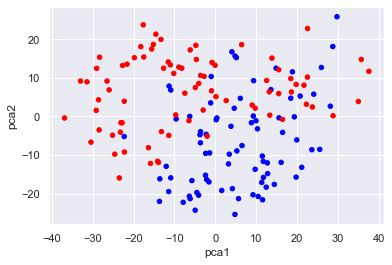

In [148]:
# Your code here:
import seaborn as sns 
import matplotlib.pyplot as plt

df.plot.scatter(x='pca1', y='pca2', c=labels)


### PCA from stats model

In [149]:
pca_stats

Principal Component Analysis(nobs: 160, nvar: 4096, transformation: Standardize (Correlation), normalization: True, number of components: 2, SVD, id: 0x24ccadc06a0)

In [150]:
df_stats = pd.DataFrame(components_stats)
df_stats.columns =['pca1','pca2']
df_stats

,pca1,pca2
0,-0.126925,-0.130697
1,-0.128883,0.016662
2,0.026380,0.029428
3,-0.040758,0.118589
4,-0.072766,-0.040100
...,...,...
155,0.072222,0.046915
156,0.066406,0.106850
157,0.126079,0.058476
158,-0.047874,-0.001204


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

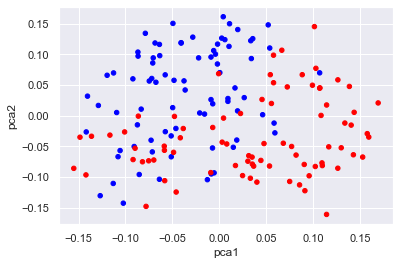

In [151]:
df_stats.plot.scatter(x='pca1', y='pca2', c=labels)

Do you see a clear separation between cats and dogs? Write your answer below.

In [152]:
# Your conclusions here:
#After analysing results of PCA calaculated from two diffrent libreries I can see that there is a clear diffrence bwteen two groups  (red) and dogs (blue)

TSNE

In [153]:
# Your code here:
from sklearn.manifold import TSNE

And now let's use t-SNE to reduce the dimensions till 2 components

In [154]:
# Your code here:

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_reduced = tsne.fit_transform(cats_dogs_std.T)

C:\Users\radek\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\radek\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 160 samples in 0.002s...
[t-SNE] Computed neighbors for 160 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 160 / 160
[t-SNE] Mean sigma: 18.548163
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.809631
[t-SNE] KL divergence after 300 iterations: 1.336317


How many information we can describe with 2 components?

The 2 components described the whole picture of cat or dog so 4096 features were replaced by 2 components, but as a graph below showed maybe the t-SNE method is not the best here because the diffrence between cat and dogs was more clear with PCA

Create a scatter plott

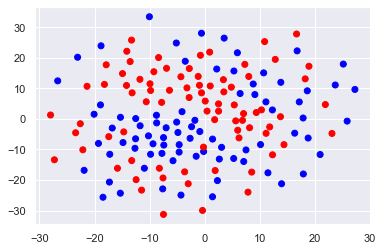

In [155]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt



plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap=plt.cm.hot)